# Project: Investigate a dataset with no-show-up information for doctor appointments.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> A dataset with information from 100k medical appointments in Brazil, focusing on the question of whether or not patients show up for their appointment, has been studied in order to see which factors can affect the show-up rate of a patient.

>It was investigated whether the following facts have an impact on the likelihood whether a patient will show up on his medical appointment:
>   1. Gender
>   2. Age
>   3. How long upfront the appointment was made.
>   4. Enrollement in Brasilian welfare program 
>   5. Location of hospital
>   6. Diagnoses of hipertension, diabetes, alcoholism or a form of handicap.
>   7. A reminder SMS was sent


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

df=pd.read_csv('noshowappointments.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties
> Getting a general feeling about the provided dataset by: 

>   1.Looking at some rows:  

In [65]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>Observations:  
>It might be easier to work with the database if all column labels are in lowercase and don't have any '-' or'_'.  
>The day format can be simplified to be only the day.

>   2.Running some general statistics:  

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>   Obervations:  
    Seems like there are some bad values for the age, since min is -1 and max 115. Need to be looked at.

>   3.Getting a feeling for the values:

In [9]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

>4.Checking the format of the data:  

In [66]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

>   Observations:  
    Dates are in string format. Best to convert to a date format.  
    No-show are strings. Convert to an integer number (1 and 0) to run statistics on this.

>   5.Checking for missing values:  

In [14]:
df.isnull().sum().any()

False

>   Observation: No missing values

>   6.Checking for duplicated values:  

In [11]:
df.duplicated().sum()

0

 >Observation: No duplicates

>   7.Plotting histograms from all parameters:  

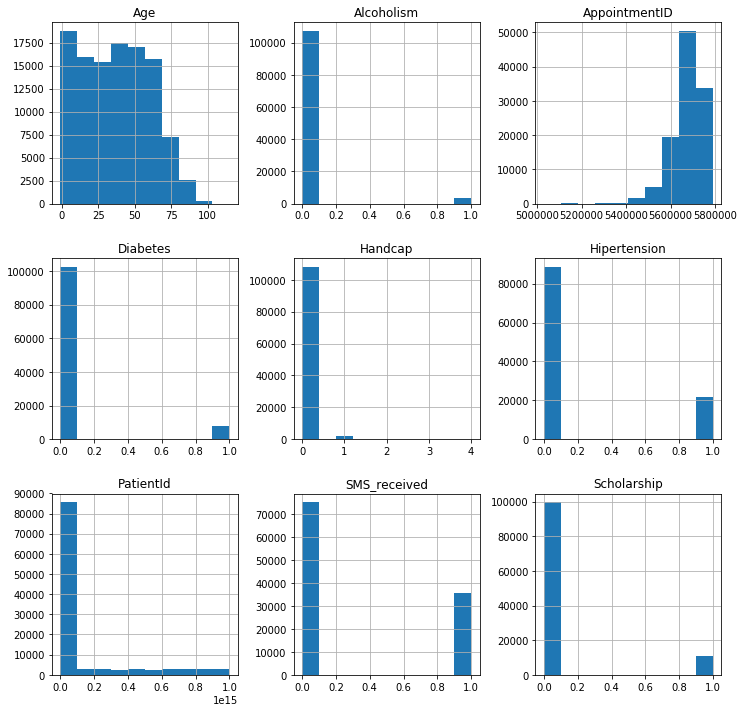

In [67]:
df.hist(figsize=(12,12));

### Data Cleaning 
> The following cleaning operations were found needed:

> 1.Rename some of the labels: only lowercase and without special character: 

In [2]:
#Rename some of the labels: only lowercase and without special character:
df=df.rename(columns = lambda x:x.lower().replace("_","").replace("-",""))
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> 2.Convert the no-show-up value to an integer to be able to run statistics on this parameter:

In [3]:
#Convert the no-show-up value to an integer to be able to run statistics on this parameter:
df['noshow']=df['noshow'].replace(to_replace='No', value=0)
df['noshow']=df['noshow'].replace(to_replace='Yes', value=1)
df['noshow'].unique()

array([0, 1], dtype=int64)

In [4]:
df['noshow'].mean()

0.20193255946510807

> 3.Convert the values for scheduled and appointment day to dates (days only) and make a parameter for the difference:  

In [5]:
#Convert the values for scheduled and appointment day to dates (days only) and make a parameter for the difference
df['scheduledday']=pd.to_datetime(df['scheduledday']).dt.date
df['appointmentday']=pd.to_datetime(df['appointmentday']).dt.date
df['scheduledday_diff']=(df['appointmentday']-df['scheduledday']).astype('timedelta64[D]').astype(int)

In [6]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,scheduledday_diff
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,15.254996
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


>Observation: When QC'ing the difference between the time the appointment was made and the actually appointment, there are some values which need to be looked at (eg: negative numbers and 179).

>Data for which the scheduled date is after the appointment must have a typo and should therefor be excluded from the database:

In [7]:
#Remove negativ values
print ('Before drop', df.shape)
df=df[df['scheduledday_diff'] >= 0]
print ('After drop', df.shape)
df.describe()

Before drop (110527, 15)
After drop (110522, 15)


,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,scheduledday_diff
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,1.474935e+14,5.675305e+06,37.089041,0.098270,0.197255,0.071868,0.030401,0.022231,0.321040,0.201896,10.184253
std,2.560866e+14,7.129722e+04,23.110064,0.297681,0.397928,0.258270,0.171689,0.161493,0.466878,0.401417,15.255115
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173700e+13,5.680574e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439277e+13,5.725525e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


In [8]:
#Investigate the rows which have a scheduled day difference of 179
df.query('scheduledday_diff in [179]')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,scheduledday_diff
102786,4.542871e+11,5134227,M,2015-12-07,2016-06-03,67,MARUÍPE,0,1,1,0,0,0,0,179
102788,2.547555e+14,5134249,F,2015-12-07,2016-06-03,63,SÃO CRISTÓVÃO,0,1,1,0,0,1,0,179
102789,3.112342e+13,5134239,F,2015-12-07,2016-06-03,60,SÃO CRISTÓVÃO,0,1,1,0,0,1,0,179
102790,9.965348e+14,5134243,M,2015-12-07,2016-06-03,73,MARUÍPE,0,1,1,0,0,0,0,179
102791,9.416259e+14,5134228,F,2015-12-07,2016-06-03,77,SÃO CRISTÓVÃO,0,1,1,0,0,1,0,179
102792,3.512659e+14,5134233,M,2015-12-07,2016-06-03,73,MARUÍPE,0,1,1,0,1,0,1,179
102795,1.216587e+12,5134197,F,2015-12-07,2016-06-03,27,SÃO CRISTÓVÃO,1,0,0,0,0,1,1,179
102796,9.582232e+12,5134223,F,2015-12-07,2016-06-03,80,SÃO CRISTÓVÃO,0,1,1,0,0,1,0,179
102797,3.189960e+13,5134220,F,2015-12-07,2016-06-03,48,MARUÍPE,0,1,1,0,0,1,0,179
102799,3.516254e+12,5134224,F,2015-12-07,2016-06-03,74,SÃO CRISTÓVÃO,0,1,1,0,0,1,0,179


> Since quite a few appointments have been scheduled 179 days upfront, it is probably correct. Keep them.  

> 4.Remove the rows which have bad values for the age:

In [9]:
#Remove the rows which have bad values for the age
df['age'].unique()
df= df[df["age"] >= 0]
df= df[df["age"] < 115]
df['age'].describe()

count    110516.000000
mean         37.085861
std          23.104465
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: age, dtype: float64

> 4.Create a gender parameter whish is a numeric value to be able to run statistics.

In [10]:
#Convert the gender value to an integer to be able to run statistics on this parameter:
df['gen_num']=df['gender'].replace(to_replace='F', value=1)
df['gen_num']=df['gen_num'].replace(to_replace='M', value=0)
df['gen_num'].unique()

array([1, 0], dtype=int64)

<a id='eda'></a>
## Exploratory Data Analysis

### 1. Has the gender an impact on the show up rate?

gender
F    0.203088
M    0.199638
Name: noshow, dtype: float64

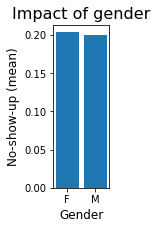

In [11]:
df_gen=df.groupby('gender')['noshow'].mean()
plt.subplots(figsize=(1,3))
plt.bar(df_gen.index,df_gen)
plt.title('Impact of gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('No-show-up (mean)', fontsize=12);

df_gen.head()

>Conclusion:  
>The gender has no impact.

### 2. Has the age an impact on the show up rate?

In [12]:
df.groupby('noshow')['age'].mean()

noshow
0    37.788753
1    34.307023
Name: age, dtype: float64

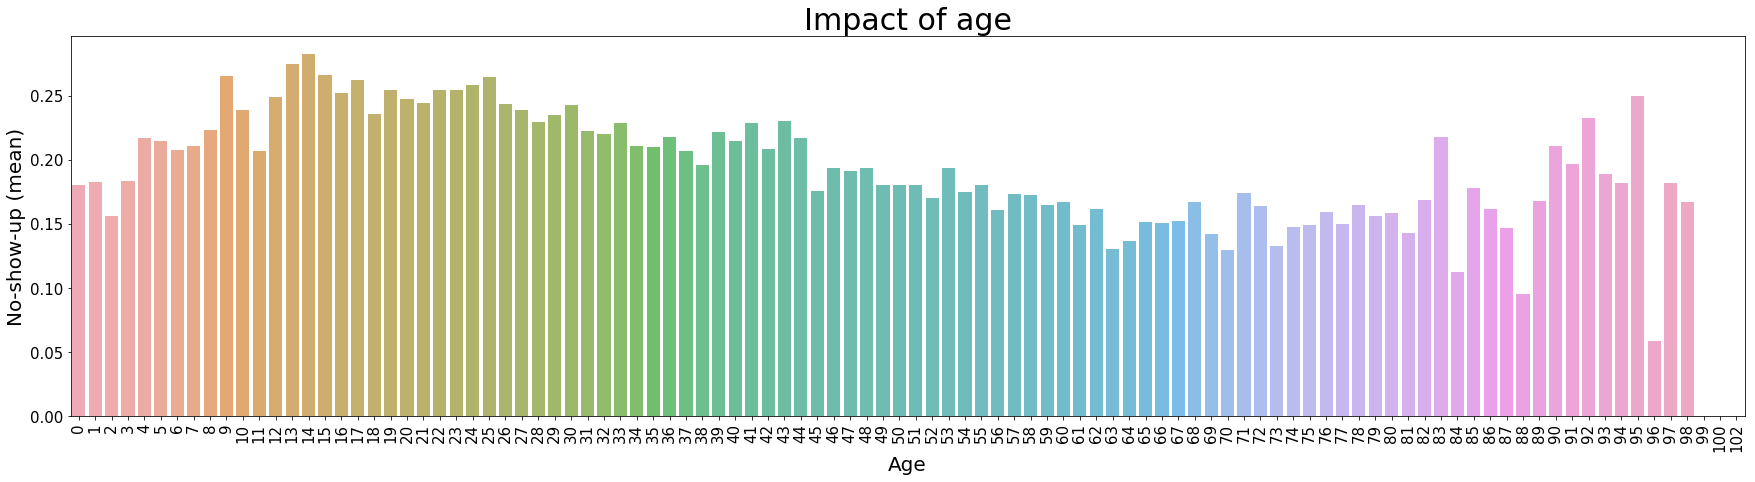

In [13]:
df_age=df.groupby('age')['noshow'].mean()

plt.figure(figsize=(30,7))
sns.barplot(df_age.index, df_age.values, alpha=0.8)
plt.title('Impact of age',fontsize=30)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('Age', fontsize=20)
plt.ylabel('No-show-up (mean)', fontsize=20)
plt.show()

>Conclusion:  
>The age has no significant impact on the average show-up rate. There is a small decrease of no-show-ups when age increases, but an increase again for 90 plussers. 

### 3. Does it has an impact how long upfront the appointment was made?

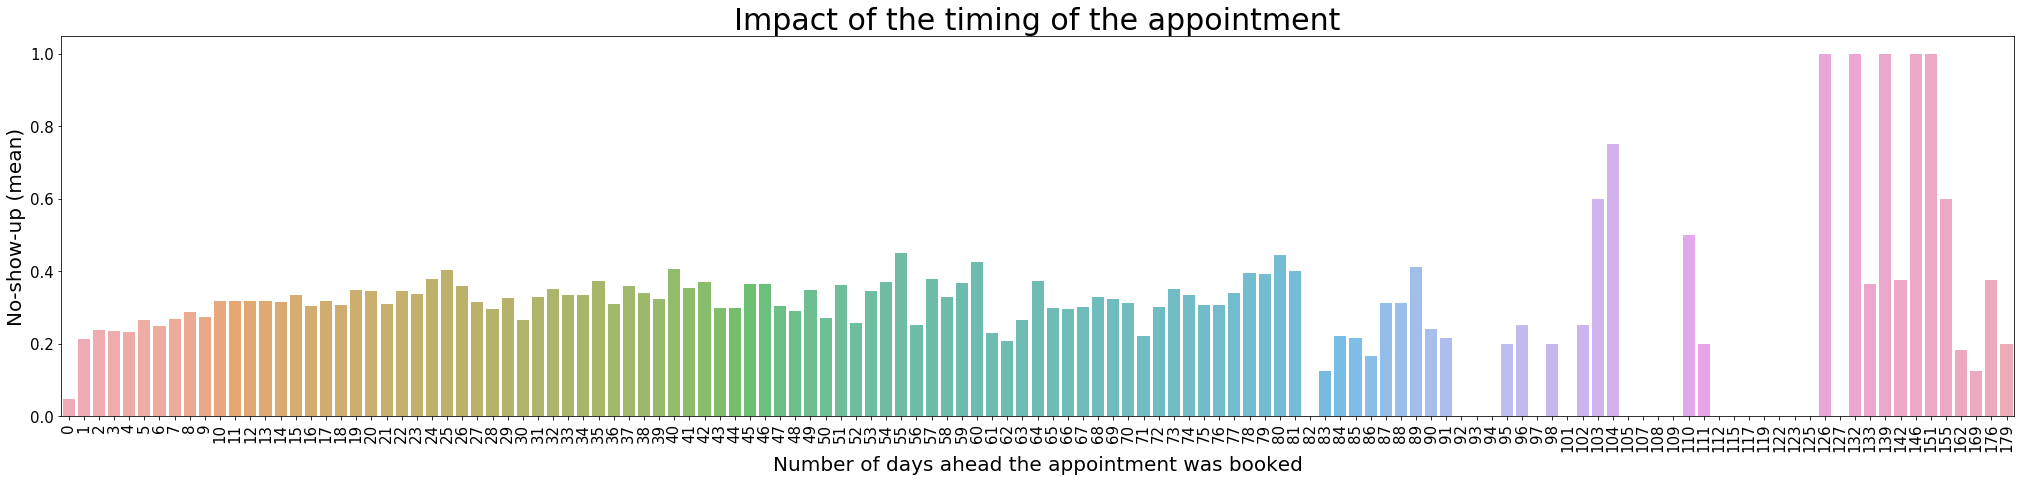

In [14]:
df_app=df.groupby('scheduledday_diff')['noshow'].mean()

plt.figure(figsize=(35,7))
sns.barplot(df_app.index, df_app.values, alpha=0.8)
plt.title('Impact of the timing of the appointment',fontsize=30)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('Number of days ahead the appointment was booked', fontsize=20)
plt.ylabel('No-show-up (mean)', fontsize=20)
plt.show()

> Conclusion:  
>When the appointment is made on the same day, the no-show-up rate is much lower.   
>When the appointment is made more then 100 days ahead, the no-show-up rate is much higher.

### 4. Does it have an inpact whether the patient is enrolled in the Brasilian welfare program?

scholarship
0    0.198013
1    0.237363
Name: noshow, dtype: float64

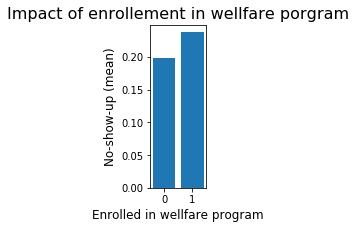

In [15]:
df_ss=df.groupby('scholarship')['noshow'].mean()
plt.subplots(figsize=(1,3))
plt.bar(df_ss.index,df_ss)
plt.title('Impact of enrollement in wellfare porgram',fontsize=16)
plt.xlabel('Enrolled in wellfare program', fontsize=12)
plt.ylabel('No-show-up (mean)', fontsize=12);

df_ss.head()

>Conclusion:  
>When the patient is enrolled in the Brasilian welfare program, the no-show-up rate is higher.

### 5. Does the location of the hospital has an impact?

In [16]:
df['neighbourhood'].value_counts().tail(10)

UNIVERSITÁRIO                  152
SEGURANÇA DO LAR               145
NAZARETH                       135
MORADA DE CAMBURI               96
PONTAL DE CAMBURI               69
ILHA DO BOI                     35
ILHA DO FRADE                   10
AEROPORTO                        8
ILHAS OCEÂNICAS DE TRINDADE      2
PARQUE INDUSTRIAL                1
Name: neighbourhood, dtype: int64

>We shouldn't run statistics on areas with less then 10 records. Remove those data points for this investigation.

In [17]:
#Exclude data for areas with less then 10 records, but not overwriting the main database.
df_neighbour=df.query('neighbourhood != ["AEROPORTO","PARQUE INDUSTRIAL","ILHAS OCEÂNICAS DE TRINDADE","ILHA DO FRADE"]')
df_neighbour['neighbourhood'].value_counts().tail()

SEGURANÇA DO LAR     145
NAZARETH             135
MORADA DE CAMBURI     96
PONTAL DE CAMBURI     69
ILHA DO BOI           35
Name: neighbourhood, dtype: int64

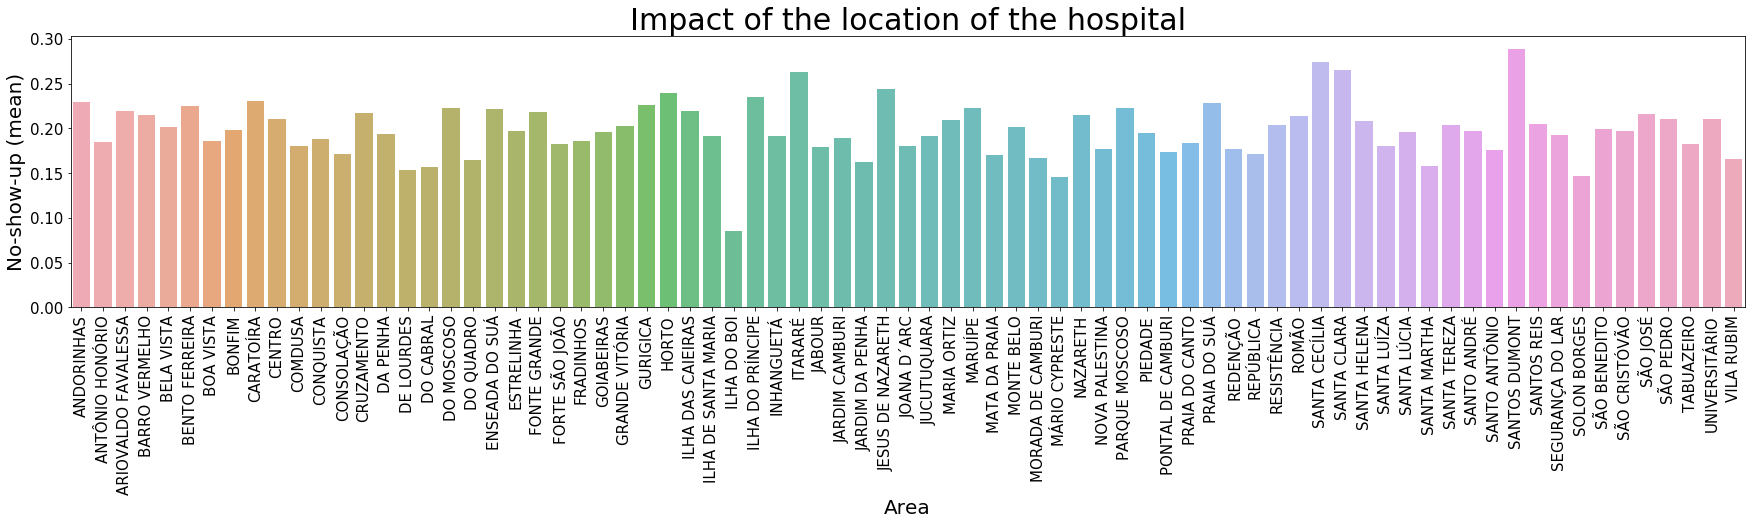

In [88]:
df_neighb=df_neighbour.groupby('neighbourhood')['noshow'].mean()
plt.figure(figsize=(30,5))
sns.barplot(df_neighb.index,df_neighb.values, alpha=0.8)
plt.title('Impact of the location of the hospital', fontsize=30)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('Area', fontsize=20)
plt.ylabel('No-show-up (mean)', fontsize=20)
plt.show()

>Conclusion:  
>The neighbourhoud Ilha do Boi has a much lower show-up rate. However, this area has only 35 entries in the database and maybe should also have been excluded. So the neighbourhood doesn't seem to impact the show-up rates. 

### 6. Does it has an impact if the patient has a diagnosis like hipertension, diabetes, alcoholism or a form of handicap?

In [18]:
df['diagnosis_tot']=df['hipertension']+df['diabetes']+df['alcoholism']+df['handcap']
df.loc[df['diagnosis_tot'] > 0, 'diagnosis_tot'] = 1
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,scheduledday_diff,gen_num,diagnosis_tot
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,1,1
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,1,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,1,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,1,1


diagnosis_tot
0    0.209247
1    0.178413
Name: noshow, dtype: float64

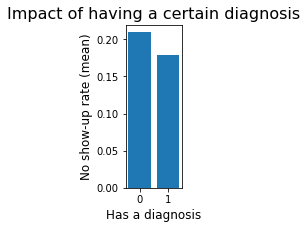

In [19]:
df_diag=df.groupby('diagnosis_tot')['noshow'].mean()  
plt.subplots(figsize=(1,3))
plt.bar(df_diag.index,df_diag)
plt.title('Impact of having a certain diagnosis',fontsize=16)
plt.xlabel('Has a diagnosis', fontsize=12)
plt.ylabel('No show-up rate (mean)', fontsize=12);

df_diag.head()

>Conclusion:  
>When the patient has a diagnosis, the no-show-up rate is slightly lower.

### 7. Does it has an impact if a reminder SMS was sent upfront?

smsreceived
0    0.166949
1    0.275753
Name: noshow, dtype: float64

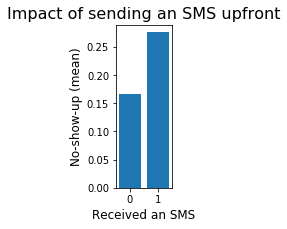

In [20]:
df_sms=df.groupby('smsreceived')['noshow'].mean()  
plt.subplots(figsize=(1,3))
plt.bar(df_sms.index,df_sms)
plt.title('Impact of sending an SMS upfront',fontsize=16)
plt.xlabel('Received an SMS', fontsize=12);
plt.ylabel('No-show-up (mean)', fontsize=12);

df_sms.head()

>Conclusion:  
>Sending out an SMS with a reminder about the appointment increases the no show-up rate considerable. This is very surprising.

<a id='conclusions'></a>
## Conclusions

> The following conclusions were reached from investigating this dataset:  

>1.The gender has no impact.  
>2.The age has no significant impact on the average show-up rate, but there is a small decrease of no-show-ups when age increases.  
>3.When the appointment is made on the same day, the no-show-up rate is much lower. When the appointment is made more then 100 days ahead, the no-show-up rate is much higher.  
>4.When the patient is enrolled in the Brasilian welfare program, the no-show-up rate is higher.  
>5.The neighbourhood doesn't seem to impact the show-up rates.  
>6.When the patient has a diagnosis, the no-show-up rate is slightly lower.  
>7.Sending out an SMS with a reminder about the appointment increases the no-show-up rate considerable.  

>Remark: There is very lidle extra information available about how this dataset was collected, so there are hidden variables we have no control over. Therefor, one has to be carefull about these drawn conclusions. For example, maybe an SMS was only sent to people that have a bad record of not showing up? That would then explain why the no-show-up rate is higher for people that received an SMS.